In [51]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from global_funcs import plot_decision_regions
import numpy as np
import tqdm

In [37]:
# returns a python dictionary
iris=datasets.load_iris()
X=iris.data[:,[2,3]]
y=iris.target
print(f"Class labels: {np.unique(y)}")

Class labels: [0 1 2]


In [38]:
# stratify means same proportions of class labels in both training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1, stratify=y)
print(f"Label counts in y_train: {np.bincount(y_train)}")
print(f"Label counts in y_test: {np.bincount(y_test)}")

Label counts in y_train: [35 35 35]
Label counts in y_test: [15 15 15]


In [39]:
# scale features
sc=StandardScaler()
sc.fit(X_train)
X_train_normalized=sc.transform(X_train)
X_test_normalized=sc.transform(X_test)


In [40]:
# use built-in Perceptron in sklearn
ppn=Perceptron(eta0=0.1,random_state=1)
ppn.fit(X_train_normalized,y_train)

# predict using trained perceptron
y_hat=ppn.predict(X_test_normalized)
print(f"Misclassified examples: {sum(y_test!=y_hat)}")

# calculate accuracy
accuracy=accuracy_score(y_test,y_hat)
print(f"Prediction accuracy score: {accuracy:.2%}")

# alternatively call ppn.score() method that first predict then accuracy_score
accuracy2=ppn.score(X_test_normalized,y_test)
print(f"Prediction accuracy score: {accuracy2:.2%}")

Misclassified examples: 1
Prediction accuracy score: 97.78%
Prediction accuracy score: 97.78%


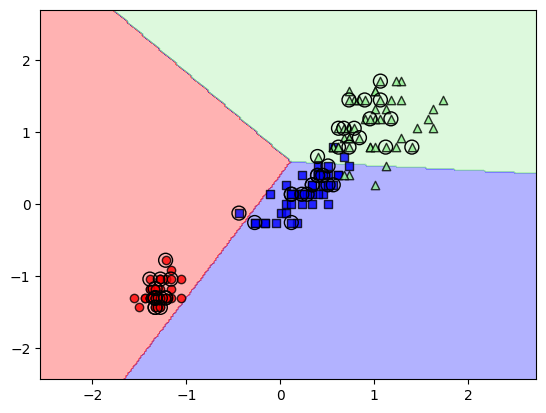

In [53]:
# plot decision region
X_combined_normalized=np.vstack((X_train_normalized, X_test_normalized))
y_combined=np.hstack((y_train, y_test))
plot_decision_regions(X_combined_normalized, y_combined, ppn, test_idx=range(105,150))

In [44]:
aa=np.random.random((1,10))
print(aa)
print(aa[:,range(5)])

[[0.47544765 0.25613491 0.54725005 0.08633863 0.78955784 0.42234592
  0.90863167 0.86943555 0.75476824 0.30427042]]
[[0.47544765 0.25613491 0.54725005 0.08633863 0.78955784]]
